### Experiment : Train RNN variants using w2v skip gram embeddings and best performed paramters
### Objectives

1. Train LSTM model
2. Train GRU model
3. Train Bidirectional model
4. Error analysis on each variant

### Paramerters

RNN - Study statistics: 
  Number of finished trials:  50
Best trial:
  Value:  0.42832933606427764
  Params: 
    layers: 1
    units: 64
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: swish
    spatial_dropout: False
    LR: 0.001

GRU -Study statistics: 
  Number of finished trials:  50
Best trial:
  Value:  0.3807172583165285
  Params: 
    layers: 1
    units: 32
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: relu
    spatial_dropout: False
    LR: 0.001

LSTM - Trial 0 finished with value: 0.3973853744023683 and parameters: {'layers': 1, 'units': 32, 'dropout_rates': 0.3, 'recurrent_dropout_rates': 0.0, 'activation': 'elu', 'spatial_dropout': False, 'LR': 0.001}. Best is trial 0 with value: 0.3973853744023683.
 
BiGRU
 

### Observations

1. 
2. 
3. 

### Solutions and further investigation

1. 
2. 
3. 

#### Load Modeules and datasets

In [ ]:
import numpy as np
import random as rn
np.random.seed(0)
rn.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
# import helper function script
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills
import TextClassifier


#### Word2vec skipgram

In [ ]:
TC = TextClassifier.TextClassifier(EMBEDDING='w2v_cbow')

#### Custom code

In [ ]:
def get_model(TC,model_type):
    from tensorflow.python.keras.models import Sequential
    #from tensorflow.keras.optimizers import Adam
    from tensorflow.python.keras.optimizer_v2.adam import Adam
    from tensorflow.python.keras.layers import Dense,Input,SpatialDropout1D,Dropout,Flatten, SimpleRNN,LSTM,RNN,GRU,Bidirectional,Embedding

    print("Build model")
    model = Sequential()
    if(TC.EMBEDDING == None):
        model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        trainable=TC.trainable))

    else:
        model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        weights=[TC.emb_matrix], # Additionally we give the Wi
                        trainable=TC.trainable)) # Don't train the embeddings 
   
    # if(spatial_dropout == True):
    #     model.add(SpatialDropout1D(dropout_rate))
    if(model_type=="RNN"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(SimpleRNN(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(SimpleRNN(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))

    elif(model_type == "LSTM"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))
    elif(model_type == "GRU"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True))
        model.add(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout))
    elif(model_type == "BiLSTM"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Bidirectional(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
        model.add(Bidirectional(LSTM(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout)))
    elif(model_type == "BiGRU"):
        if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Bidirectional(GRU(TC.unit, activation=TC.activation, dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
        model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout)))
    #model.add(Dropout(0.2))
    if TC.layer!=0:
            for i in range(TC.layer):
                model.add(Dense(TC.unit, activation=TC.activation))
                model.add(Dropout(TC.dropout_rate))
    model.add(Dense(TC.unit, activation=TC.activation))
    model.add(Dropout(TC.dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    optimizer_adam = Adam(learning_rate=TC.lr)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer_adam,
                metrics=['acc'])
    model.summary()
    TC.model = model
    return model

In [ ]:
def build_model(TC):
    from tensorflow.python.keras.models import Sequential
    from tensorflow.python.keras.optimizer_v2.adam import Adam
    from tensorflow.python.keras.layers import Dense,Input,SpatialDropout1D,Dropout,Flatten, SimpleRNN,LSTM,RNN,GRU,Bidirectional,GlobalMaxPool1D,Conv1D
    from tensorflow.python.keras.layers.embeddings import Embedding
    model = Sequential()
    model.add(Embedding(output_dim=TC.EMBEDDING_SIZE, 
                        input_dim=TC.LEN_VOCAB, 
                        input_length=TC.MAX_SEQ_LEN,
                        weights=[TC.emb_matrix], # Additionally we give the Wi
                        trainable=TC.trainable)) # Don't train the embeddings - just use GloVe embedding
    #model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
    model.add(Bidirectional(GRU(TC.unit, activation=TC.activation,dropout=TC.dropout_rate, recurrent_dropout=TC.recurr_dropout,return_sequences=True)))
    model.add(Conv1D(TC.unit, 4))
    model.add(GlobalMaxPool1D())
    model.add(Dense(TC.unit, activation=TC.activation))
    model.add(Dense(1,activation='sigmoid'))
    optimizer_adam = Adam(learning_rate=TC.lr)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer_adam,
                metrics=['acc'])
    print(model.summary())
    TC.model = model
    return model

In [ ]:
def predict_proba(arr,TC=TC):
    import numpy as np
    from tensorflow.python.keras.preprocessing import sequence
    pred=TC.model.predict(sequence.pad_sequences(TC.token.texts_to_sequences(arr),maxlen=TC.MAX_SEQ_LEN))
    returnable=[]
    for i in pred:
        temp=i[0]
        returnable.append(np.array([1-temp,temp]))
    return np.array(returnable)


def error_analysis(TC,model,Y_pred):
    import numpy as np
    from IPython.display import display
    import matplotlib.pyplot as plt
    import eli5
    from eli5.lime import TextExplainer
    import shap
    from lime.lime_text import LimeTextExplainer
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    from tensorflow.python.keras.preprocessing import sequence

    import tensorflow.keras.backend as K
    #token = Tokenizer(num_words=self.LEN_VOCAB)
    #token.fit_on_texts(self.X_tr)
    lime_explainer= LimeTextExplainer(class_names=[0,1])

    te = TextExplainer(random_state=0)
    distrib_samples = TC.X_train[:100]
    explainer = shap.DeepExplainer(model, distrib_samples)
    # explain the first 25 predictions
    # explaining each prediction requires 2 * background dataset size runs
    num_explanations = 25 #len(TC_F.X_test)
    shap_values = explainer.shap_values(TC.X_test[:num_explanations])
    shap.initjs()
    num2word = {}
    arr_index=TC.X_te.index
    for w in TC.word_index.keys():
        num2word[TC.word_index[w]] = w
    x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), TC.X_test[i]))) for i in range(num_explanations)])
    i=0
    
    for s in TC.X_te:
        if(i==10):  # take 25 misclassified instances
            break
        if(TC.Y_test[arr_index[i]] != Y_pred[i]):
            print(s)
            print("Predicted Label : ",TC.result_map(Y_pred[i])," | Turth Label : ",TC.result_map(TC.Y_test[arr_index[i]]))
            te.fit(TC.X_te[arr_index[i]],predict_proba)
            shap.force_plot(explainer.expected_value[0], shap_values[0][i], x_test_words[i],matplotlib=True)
            display(te.show_prediction(target_names=[0,1]))
            display(lime_explainer.explain_instance(TC.X_te[arr_index[i]],predict_proba).show_in_notebook(text=True))
            i+=1
        print()

In [ ]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna RNN w2v cbow"
TC.activation = 
TC.recurr_dropout = 
TC.unit =
TC.layer = 
TC.dropout_rate = 

#### RNN

In [6]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna RNN w2v cbow"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit = 64
TC.layer = 1
TC.dropout_rate = 0.3

rnn_model = get_model(TC,"RNN")
rnn_model, hist = TC.train_model(rnn_model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          6000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100, 64)           23360     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

train loss -  0.4338131526034857  train acc-  0.8265577
test loss -  0.4999419872293767  test acc-  0.7824742
Train acc: 0.827, Test acc: 0.782


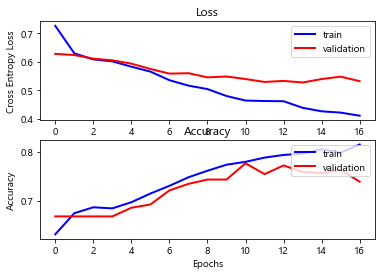

========= Eperiment -  optuna RNN w2v cbow  =========


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-564
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1336
           1       0.68      0.57      0.62       604

    accuracy                           0.78      1940
   macro avg       0.75      0.72      0.73      1940
weighted avg       0.78      0.78      0.78      1940

Predicted     0    1
Actual              
0          1173  163
1           259  345


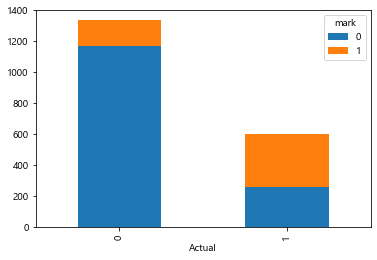

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [7]:

Y_pred = TC.model_evaluate(rnn_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [ ]:
error_analysis(TC,rnn_model,Y_pred)

#### GRU
Study statistics: 

  Number of finished trials:  50
  
Best trial:

  Value:  0.3807172583165285
  Params: 
    layers: 1
    units: 32  try 64
    dropout_rates: 0.3
    recurrent_dropout_rates: 0.1
    activation: relu   try swish
    spatial_dropout: False
    LR: 0.001

In [8]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna GRU w2v cbow"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
gru_model = get_model(TC,"GRU")
gru_model, hist = TC.train_model(gru_model)

Build model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
gru (GRU)                    (None, 100, 32)           31968     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)   

train loss -  0.3206656253211434  train acc-  0.8674326
test loss -  0.43097161693671315  test acc-  0.81082475
Train acc: 0.867, Test acc: 0.811


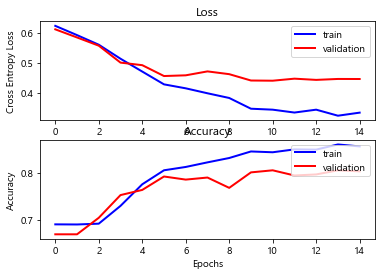

========= Eperiment -  optuna GRU w2v cbow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-565
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1336
           1       0.68      0.74      0.71       604

    accuracy                           0.81      1940
   macro avg       0.78      0.79      0.78      1940
weighted avg       0.82      0.81      0.81      1940

Predicted     0    1
Actual              
0          1129  207
1           160  444


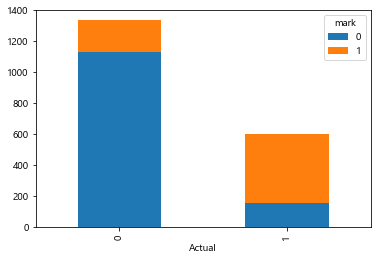

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට් එක

In [9]:

Y_pred = TC.model_evaluate(gru_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [ ]:
error_analysis(TC,gru_model,Y_pred)

#### LSTM

In [10]:
TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna LSTM w2v cbowow"
TC.activation = 'tanh'
TC.recurr_dropout = 0.0
TC.unit =32
TC.layer = 0
TC.dropout_rate = 0.1
lstm_model = get_model(TC,"LSTM")
lstm_model, hist = TC.train_model(lstm_model)

Build model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 6,043,713
Trainable params: 43,713
Non-trainable params: 6,000,000
_________________________________________________________________
started training
Train on 4073 samples, validate on 453 samples
Epoch 1/50

Epoch 00001: val_

train loss -  0.3181153550460915  train acc-  0.8722934
test loss -  0.45735073501301793  test acc-  0.7917526
Train acc: 0.872, Test acc: 0.792


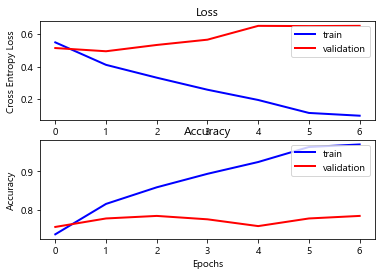

========= Eperiment -  optuna LSTM w2v cbowow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-566
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1336
           1       0.68      0.63      0.65       604

    accuracy                           0.79      1940
   macro avg       0.76      0.75      0.75      1940
weighted avg       0.79      0.79      0.79      1940

Predicted     0    1
Actual              
0          1158  178
1           226  378


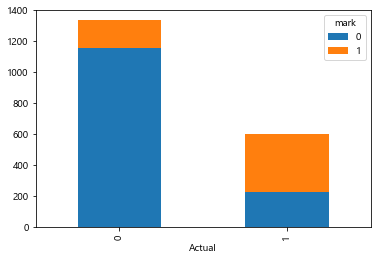

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [11]:
Y_pred = TC.model_evaluate(lstm_model,hist)
TC.save_predictions(Y_pred,TC.tag)

In [ ]:
error_analysis(TC,lstm_model,Y_pred)

#### Bidirection LSTM

In [12]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna Bilstm w2v cbow"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
bilstm_model = get_model(TC,"BiLSTM")
bilstm_model, hist = TC.train_model(bilstm_model)

Build model
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 64)           85248     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
__________________

Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
I


Epoch 00002: val_loss did not improve from 420685335.73510
4073/4073 - 49s - loss: nan - acc: 0.5856 - val_loss: nan - val_acc: 0.6689
Epoch 3/50


Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
I


Epoch 00003: val_loss did not improve from 420685335.73510
4073/4073 - 51s - loss: nan - acc: 0.6911 - val_loss: nan - val_acc: 0.6689
Epoch 4/50


Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
I


Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00004: val_loss did not improve from 420685335.73510
4073/4073 - 51s - loss: nan - acc: 0.6911 - val_loss: nan - val_acc: 0.6689
Epoch 5/50


Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
I


Epoch 00005: val_loss did not improve from 420685335.73510
4073/4073 - 51s - loss: nan - acc: 0.6911 - val_loss: nan - val_acc: 0.6689
Epoch 6/50


Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel batch_loss. Metrics with nan or +/-inf values will not be sent to server
I

Restoring model weights from the end of the best epoch.


Invalid metric value: nan for channel epoch_loss. Metrics with nan or +/-inf values will not be sent to server
Invalid metric value: nan for channel epoch_val_loss. Metrics with nan or +/-inf values will not be sent to server



Epoch 00006: val_loss did not improve from 420685335.73510
4073/4073 - 51s - loss: nan - acc: 0.6911 - val_loss: nan - val_acc: 0.6689
Epoch 00006: early stopping


train loss -  381049073.6756518  train acc-  0.48387095
test loss -  451228616.04948455  test acc-  0.46494845
Train acc: 0.484, Test acc: 0.465


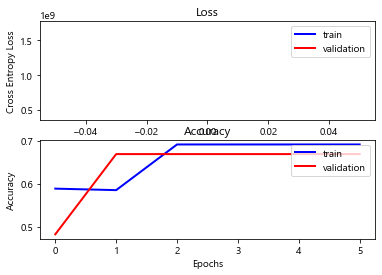

========= Eperiment -  optuna Bilstm w2v cbow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-567
              precision    recall  f1-score   support

           0       0.66      0.46      0.54      1336
           1       0.29      0.48      0.36       604

    accuracy                           0.47      1940
   macro avg       0.47      0.47      0.45      1940
weighted avg       0.54      0.47      0.48      1940

Predicted    0    1
Actual             
0          616  720
1          317  287


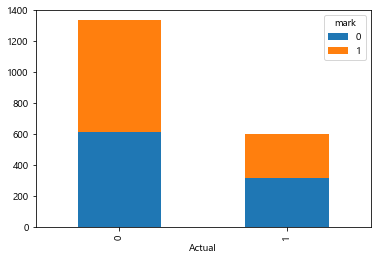

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට් එකම එක

In [13]:
Y_pred = TC.model_evaluate(bilstm_model,hist)
TC.save_predictions(Y_pred,TC.tag)

#### BiGRU

In [14]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna BiGRU w2v cbow"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
bigru_model = get_model(TC,"BiGRU")
bigru_model, hist = TC.train_model(bigru_model)

Build model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 64)           63936     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                18624     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)   

train loss -  0.37016775942038393  train acc-  0.83406985
test loss -  0.45093264524469673  test acc-  0.8051546
Train acc: 0.834, Test acc: 0.805


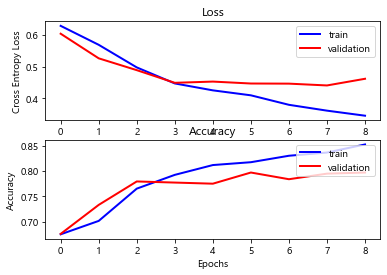

========= Eperiment -  optuna BiGRU w2v cbow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-568
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1336
           1       0.68      0.69      0.69       604

    accuracy                           0.81      1940
   macro avg       0.77      0.77      0.77      1940
weighted avg       0.81      0.81      0.81      1940

Predicted     0    1
Actual              
0          1143  193
1           185  419


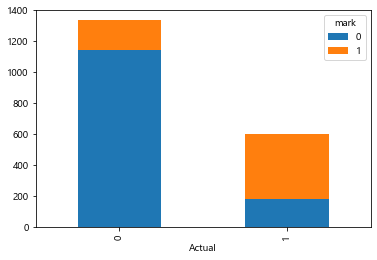

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට

In [15]:

Y_pred = TC.model_evaluate(bigru_model,hist)
TC.save_predictions(Y_pred,TC.tag)

#### BiDirectional LSTM + CNN

In [16]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna BiLSTM  CNN w22v cbow"
TC.activation = 'tanh'
TC.recurr_dropout = 0.0
TC.unit =32
TC.layer = 0
TC.dropout_rate = 0.3
bilstmcnn_model = build_model(TC)
bilstmcnn_model, hist = TC.train_model(bilstmcnn_model)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 64)           63936     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 64)           18624     
_________________________________________________________________
conv1d (Conv1D)              (None, 97, 32)            8224      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

train loss -  0.27495705907554474  train acc-  0.8875387
test loss -  0.39888450730707226  test acc-  0.83762884
Train acc: 0.888, Test acc: 0.838


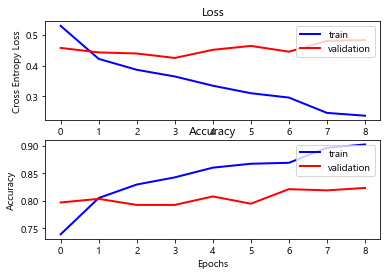

========= Eperiment -  optuna BiLSTM  CNN w22v cbow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-569
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1336
           1       0.81      0.63      0.71       604

    accuracy                           0.84      1940
   macro avg       0.83      0.78      0.80      1940
weighted avg       0.83      0.84      0.83      1940

Predicted     0    1
Actual              
0          1245   91
1           224  380


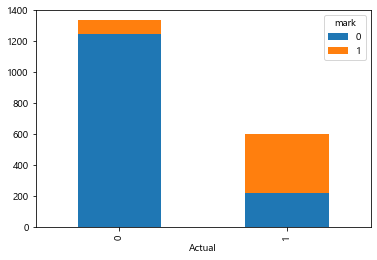

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ සෙට් එක

In [17]:
Y_pred = TC.model_evaluate(bilstmcnn_model,hist)
TC.save_predictions(Y_pred,TC.tag)

#### BiGRU + CNN

In [18]:

TC.EPOCHS =50
TC.BATCH_SIZE =16
TC.lr = 0.001
TC.tag = "optuna BiGRU  CNN w2v cbow"
TC.activation = 'relu'
TC.recurr_dropout = 0.1
TC.unit =32
TC.layer = 1
TC.dropout_rate = 0.3
grucnn_model = build_model(TC)
grucnn_model, hist = TC.train_model(grucnn_model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 64)           63936     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 64)           18624     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 97, 32)            8224      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

train loss -  0.360397529704772  train acc-  0.8513036
test loss -  0.42083479196754925  test acc-  0.81958765
Train acc: 0.851, Test acc: 0.820


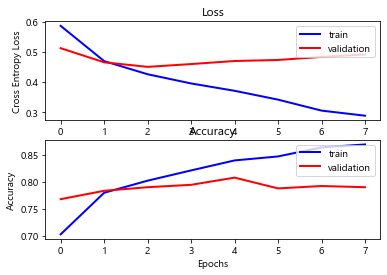

========= Eperiment -  optuna BiGRU  CNN w2v cbow  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-570
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1336
           1       0.75      0.64      0.69       604

    accuracy                           0.82      1940
   macro avg       0.80      0.77      0.78      1940
weighted avg       0.82      0.82      0.82      1940

Predicted     0    1
Actual              
0          1206  130
1           220  384


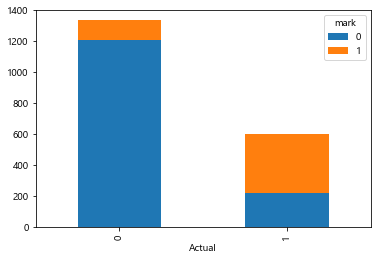

එන්න එන්න දැන් පරක්කු නෑ මුළ ටික හෙට එකෙන් අහමු ඊට පස්සේ ආයම
Predicted Label :  Not Hate  | Turth Label :  Not Hate

ඕකගේ ලාච්චුවේ දාපල්ලා නරුමයා
Predicted Label :  Not Hate  | Turth Label :  Hate

කන්න බොන්න දීලා කරට අත දාගෙන පිටිපස්සෙන් පිහියෙන් අනින සිස්ටම් එක තමයි පර්සි ලග තිබ්බෙ අන්තිමට පර්සි ලග හිටියා සුමනයා පර්සිටත් දුන්නෙ එවැනිම පාරක් තමයි හතර ගාතෙන් ඇදගෙන වැටෙන්න
Predicted Label :  Not Hate  | Turth Label :  Not Hate

කෝටි න් ගියත් ත්‍රී වීල් එකෙන් ගියත් යන්නෙ එකම පාරෙ නෙ බං කවදාහරි දවසක ඕකත් දිරලා වල පල්ලට යනවා කෝටි කින් කරන්න තව වැඩ කොච්චර නම් තියේද
Predicted Label :  Not Hate  | Turth Label :  Hate

ඒකි හිතන් ඇත්තේ අපිට පුපේ ඉත්තෑවෝ දුවනව කියලද දන්නෑ ෆේක් වලින් හරි ගිහින් එව්ව බලන්න
Predicted Label :  Not Hate  | Turth Label :  Hate

මේ තට්ටයව මුණ ගැහිලම විස්තරේ අහගනින් සියනෑවේ සිංහයා කියලා ඡන්දෙට ඉල්ලුවෙ සිංහයෙක් තියා හිවලෙක්වත් වෙන්න බෑ කියලා දැන් ඔප්පු වෙලා තියෙන්නෙ
Predicted Label :  Not Hate  | Turth Label :  Hate

සිවුරක් දමාගැනීම දමිත් අසංක පුක පෙන්වීම පිදුරංගල වීරයෝ

Unexpected error in ping thread.
Traceback (most recent call last):
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 1344, in getresponse
    response.begin()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\Kavishka\anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into

In [19]:

Y_pred = TC.model_evaluate(grucnn_model,hist)
TC.save_predictions(Y_pred,TC.tag)